## Cortical dispersion summary  

In [8]:
import pandas as pd
import seaborn as sns
import os 
import numpy as np
import matplotlib.pyplot as plt
from connectivity import weights as cweights
from connectivity import visualize as summary
from connectivity import data as cdata
import connectivity.constants as const


In [12]:
# Import the relevant function from the scripts
import sys
sys.path.append('/Users/jdiedrichsen/Python/cerebellum_connectivity/connectivity/scripts')
from script_cortical_dispersion import plot_dispersion

ModuleNotFoundError: No module named 'script_cortical_dispersion'

In [3]:
def plot_dispersion(method='ridge',cortex='tessels0042'):
    dirs = const.Dirs(exp_name='sc1')
    fpath = os.path.join(dirs.conn_train_dir, 'cortical_dispersion_stats.csv')
    df = pd.read_csv(fpath)
    df['w_var']=df.Variance*df.sum_w
    df = df[df.cortex==cortex]
    T=df.groupby(['sn','roi'])
    T = T.apply(np.mean)
    T['var_w'] = T.w_var/T.sum_w
    fig, axes = plt.subplots(2, 2,figsize=(12,10))
    sns.lineplot(data=df,x='roi',y='Variance',hue='hem',ax=axes[0,0])
    axes[0,0].set_title('Spherical Var by Hemisphere')
    sns.lineplot(data=df,x='roi',y='sum_w',hue='hem',ax=axes[0,1])
    axes[0,1].set_title('Sum of weights for hemisphere')
    sns.lineplot(data=T,x='roi',y='Variance',ax=axes[1,0])
    axes[1,0].set_title('Raw averaged Spherical Var')
    sns.lineplot(data=T,x='roi',y='var_w',ax=axes[1,1])
    axes[1,1].set_title('weighted spherical Var')
    return T


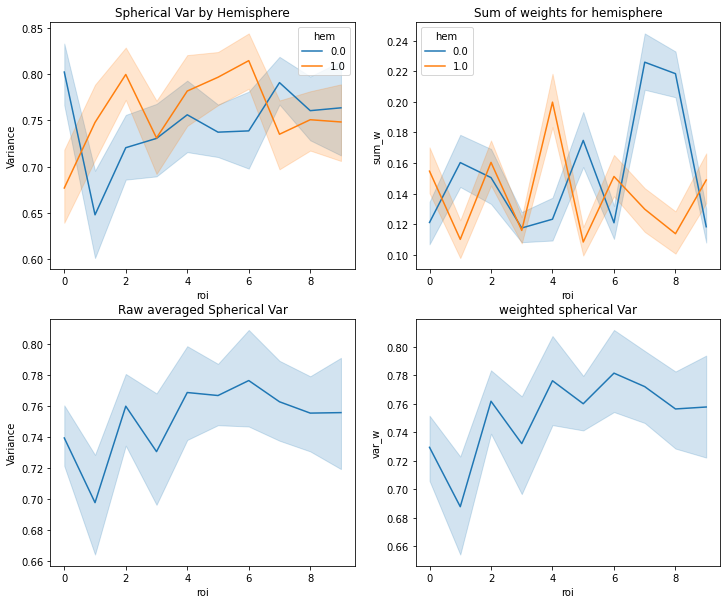

In [6]:
T  = plot_dispersion(cortex='tessels0042')